<img src="mmu_logo.png" style="height: 80px;" align=left>  

# Week 4: Learning Objectives

Towards the end of this lesson, you should be able to:
- write Python codes for association rule mining
- experimenting with laundry dataset and linear regression


## Import the Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', 500)

# Association Rule Mining

### Importing the Dataset

In [7]:
# load store_data.csv dataset

store_data = pd.read_csv('store_data.csv', header=None)
store_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:

In [5]:
# transform the original dataset into ARM friendly format

records = []

# your codes here...
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0,20)])

In [8]:
#records

### Applying Apriori Algorithm

You must set the parameters in the apriori algorithm. <br>


In [9]:
# run apriori function

# your codes here...
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)
association_results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

### Check the output

In [10]:
len(association_results)

48

In [11]:
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


### Output in better presentation

In [12]:
cnt =0

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) chicken -> light cream
Support: 0.005
Confidence: 0.2906
Lift: 4.844
(Rule 2) mushroom cream sauce -> escalope
Support: 0.006
Confidence: 0.3007
Lift: 3.7908
(Rule 3) pasta -> escalope
Support: 0.006
Confidence: 0.3729
Lift: 4.7008
(Rule 4) ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3235
Lift: 3.292
(Rule 5) ground beef -> tomato sauce
Support: 0.005
Confidence: 0.3774
Lift: 3.8407
(Rule 6) olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2715
Lift: 4.1224
(Rule 7) pasta -> shrimp
Support: 0.005
Confidence: 0.322
Lift: 4.5067
(Rule 8) nan -> chicken
Support: 0.005
Confidence: 0.2906
Lift: 4.844
(Rule 9) chocolate -> frozen vegetables
Support: 0.005
Confidence: 0.2326
Lift: 3.2545
(Rule 10) cooking oil -> ground beef
Support: 0.005
Confidence: 0.5714
Lift: 3.282
(Rule 11) mushroom cream sauce -> nan
Support: 0.006
Confidence: 0.3007
Lift: 3.7908
(Rule 12) pasta -> nan
Support: 0.006
Confidence: 0.3729
Lift: 4.7008
(Rule 13) frozen vegetables -> ground 

# Linear Regression

In [13]:
df_all = pd.DataFrame()
for i in range(4):
    filename = './data/file' + str(i+1) + ".xlsx"
    df = pd.read_excel(filename, sheet_name='Reading', skiprows = 2, usecols = 'G:AB') 
    df.drop(df.index[31:], inplace=True)
    df_all = df_all.append(df) 
df_all = df_all.fillna(0)
df_all = df_all/56*5 # this is just a data transformation to Ringgit Malaysia
df_all = df_all.round(2)
df_all.head()

,Detergent 1,Detergent 2,Detergent 3,Detergent 4,Softener 1,Softener 2,Bleach 1,Bleach 2,Aroma 1,Aroma 2,Bag 1,Bag 2,W1,W2,W3,W4,W5,W6,D7,D8,D9,D10
0,1.70,1.70,1.52,1.61,1.07,1.07,2.23,2.23,1.96,1.96,1.70,1.79,18.12,33.39,67.77,49.02,41.52,33.84,56.16,30.36,25.80,46.07
1,1.61,1.52,1.25,1.25,0.89,0.89,2.14,2.14,1.88,1.96,1.61,1.70,6.07,7.14,37.95,42.59,24.82,38.04,28.30,4.55,19.73,23.30
2,1.61,1.52,1.07,1.16,0.89,0.89,2.05,2.05,1.88,1.96,1.52,1.61,10.18,20.27,39.55,28.39,19.73,35.89,4.55,13.66,18.75,14.73
3,1.61,1.52,1.07,1.16,0.80,0.80,1.88,1.96,1.79,1.88,1.52,1.52,7.14,21.25,19.73,48.12,35.98,36.52,22.77,19.20,18.21,23.75
4,2.32,2.23,1.70,1.61,1.43,1.52,1.79,1.88,1.70,1.70,1.34,1.34,12.68,38.93,38.48,46.07,33.93,58.75,36.43,25.27,24.38,41.52


In [14]:
# Transform the dataset format

# melt() - To make analysis of data in table easier, we can reshape the data 
# into a more computer-friendly form

df_all_melt = df_all.melt() # if we not melt, we cant do analysis through chart
df_all_melt.columns = ['Item', 'Sales']
a=df_all_melt.loc[df_all_melt['Item']=='Detergent 1','Sales']
df_all_melt['Sales'].sum()

62845.22

In [15]:
df_all_melt 

,Item,Sales
0,Detergent 1,1.70
1,Detergent 1,1.61
2,Detergent 1,1.61
3,Detergent 1,1.61
4,Detergent 1,2.32
...,...,...
2679,D10,60.09
2680,D10,62.68
2681,D10,56.52
2682,D10,20.27


Text(0.5, 0, 'Items')

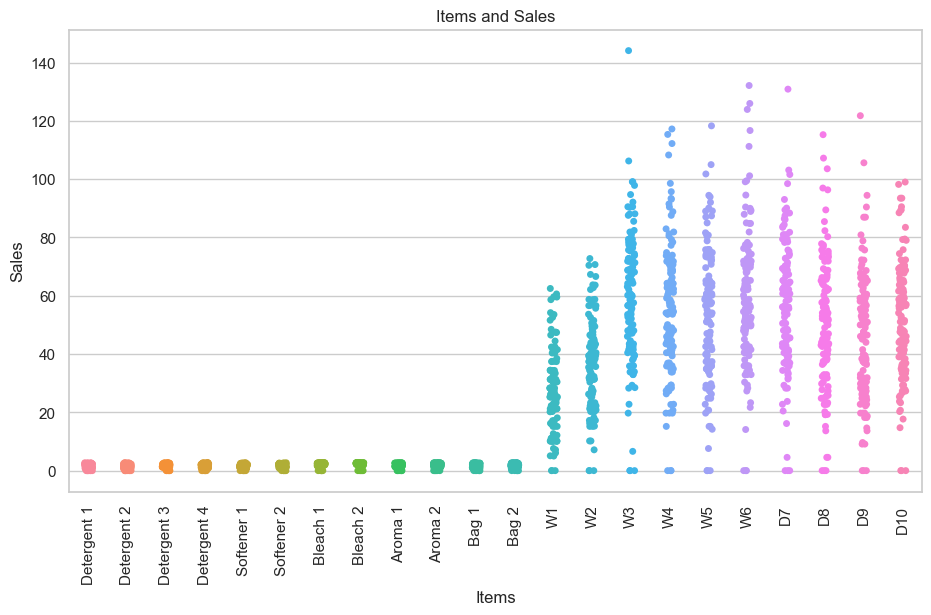

In [16]:
sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

a = sns.stripplot(x="Item", y="Sales", data=df_all_melt)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_title('Items and Sales')
a.set_ylabel('Sales')
a.set_xlabel('Items')


Text(0.5, 0, 'Items')

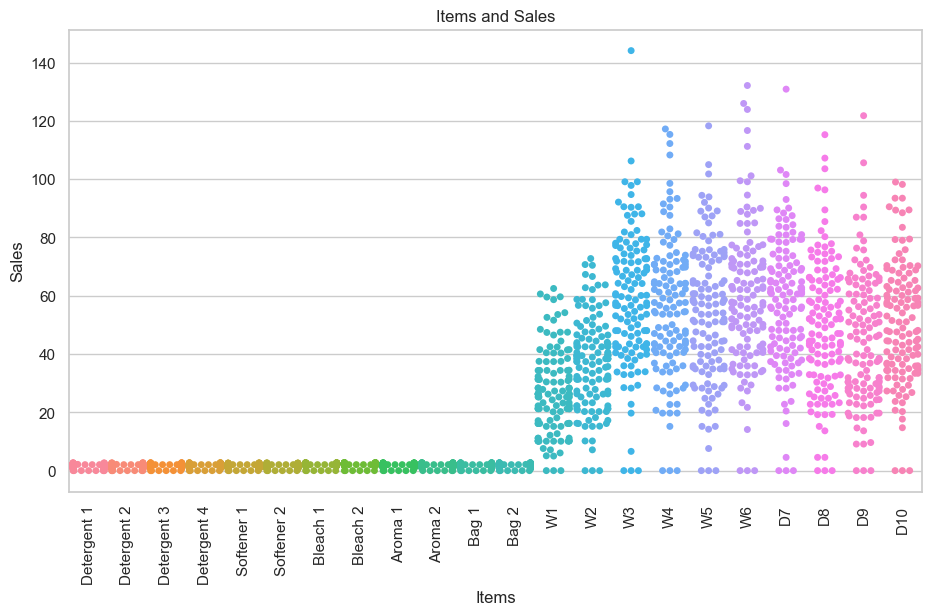

In [17]:
# Plot swarmplot

sns.set(rc={'figure.figsize':(11, 6)})
sns.set(style="whitegrid", color_codes=True)

# your codes here...
a = sns.swarmplot(x='Item', y='Sales', data=df_all_melt)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_title('Items and Sales')
a.set_ylabel('Sales')
a.set_xlabel('Items')

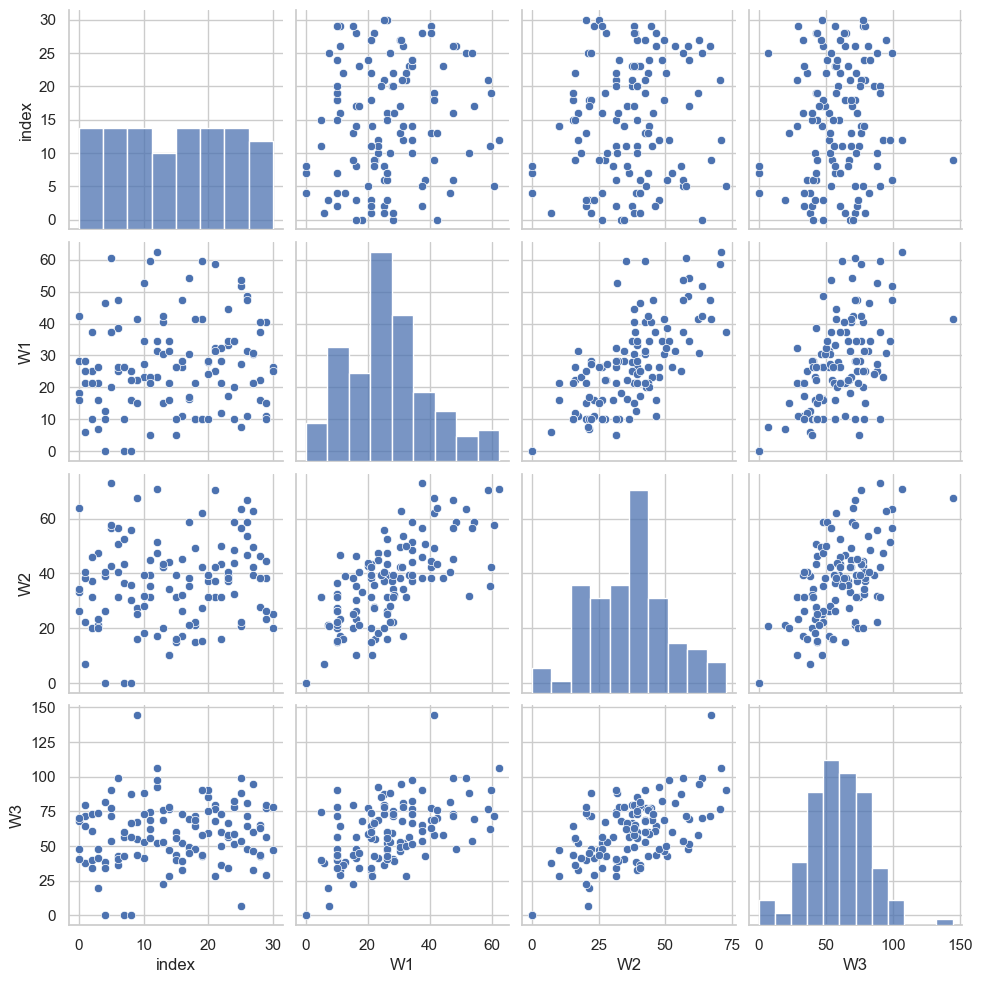

In [18]:
# plot pairplot

df_w123 = df_all[['W1','W2','W3']].reset_index()

# your codes here...
sns.pairplot(df_w123)

<AxesSubplot:>

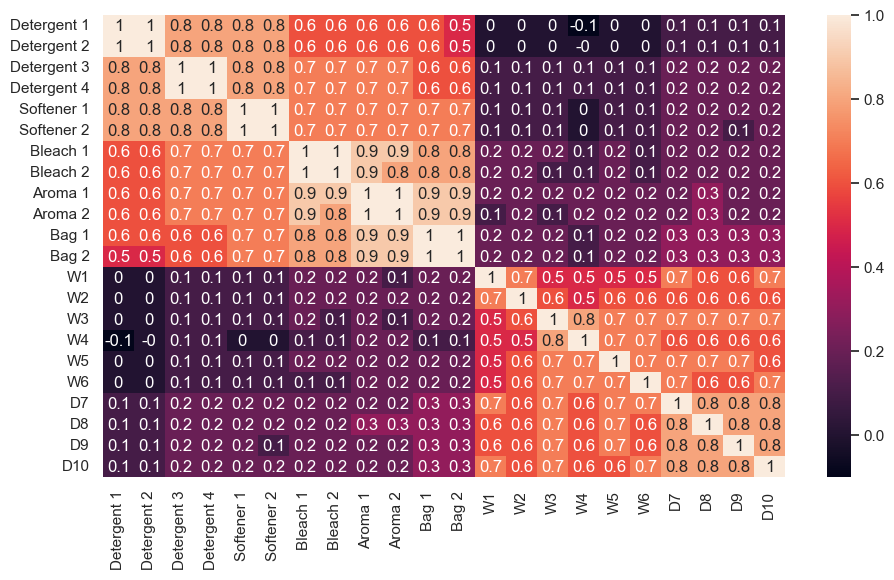

In [19]:
# plot heatmap to show the correlation

sns.set(rc={'figure.figsize':(11,6)})
correlation_matrix = df_all.iloc[:,:].corr().round(1)

# your codes here...
sns.heatmap(data=correlation_matrix, annot=True)

In [20]:
# Perform grouping for Item-Sales

df_itemSales = df_all_melt.groupby(["Item"]).sum() 
df_itemSales.reset_index(inplace=True)
df_itemSales.head()

,Item,Sales
0,Aroma 1,227.60
1,Aroma 2,229.58
2,Bag 1,212.99
3,Bag 2,212.20
4,Bleach 1,267.92


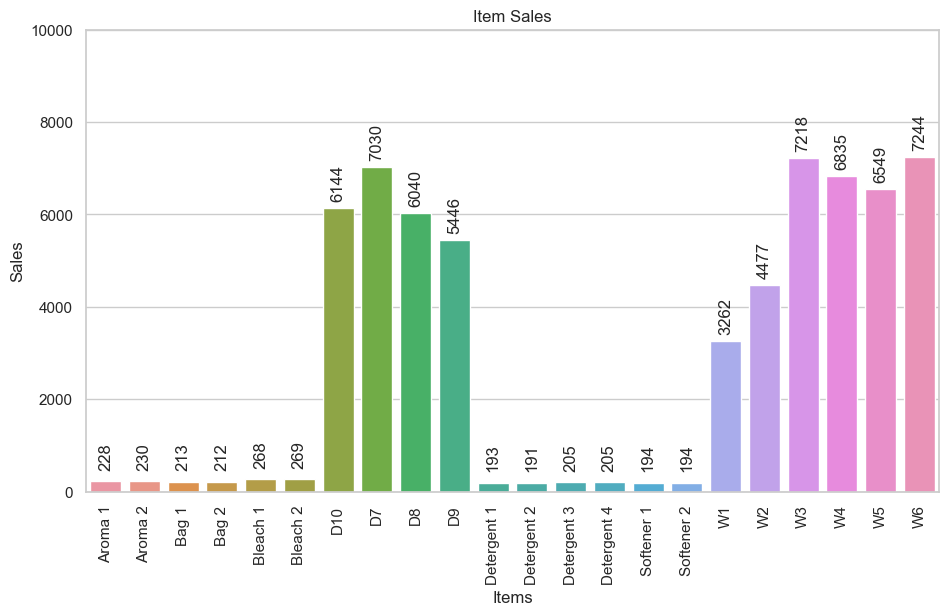

In [21]:
# Plot Item-Sales barchart

sns.set(rc={'figure.figsize':(11,6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x="Item", y="Sales",  data=df_itemSales)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title('Item Sales')
b.set_ylabel('Sales')
b.set_xlabel('Items')
b.set(ylim=(0, 10000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=90, 
	xytext=(0, 18), textcoords='offset points')



In [22]:
# Getting the daily sales

df_dailySales = df_all.groupby(df_all.index).sum() 
df_dailySales.reset_index(drop=True, inplace=True) 
df_dailySales = df_dailySales.sum(axis=1).to_frame() 
df_dailySales.columns = ['Sales'] 


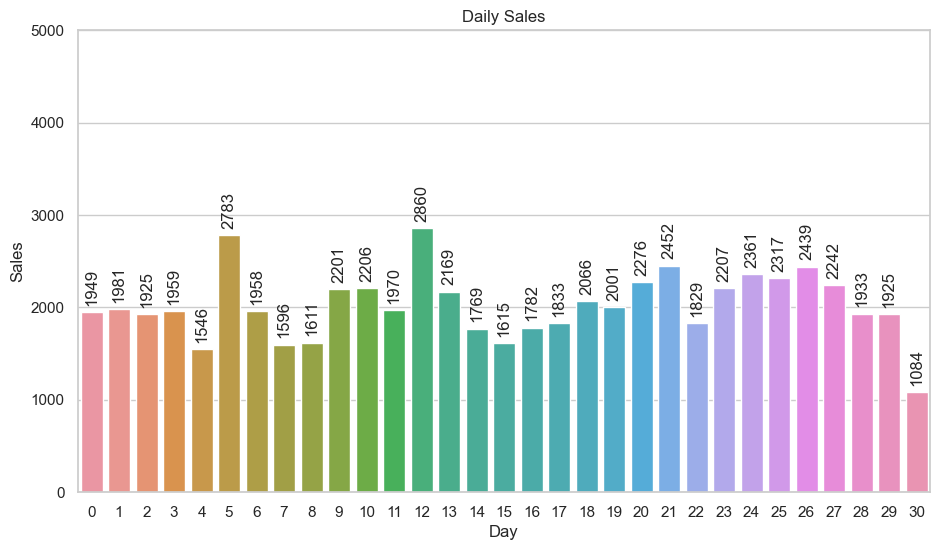

In [23]:
# Plot daily sales

sns.set(rc={'figure.figsize':(11, 6)})
sns.set(style="whitegrid", color_codes=True)

b = sns.barplot(x=df_dailySales.index, y="Sales",  data=df_dailySales)
b.set_xticklabels(b.get_xticklabels(), rotation=0)
b.set_title('Daily Sales')
b.set_ylabel('Sales')
b.set_xlabel('Day')

b.set(ylim=(0, 5000))

for p in b.patches:
    	b.annotate("%.0f" % p.get_height(), (p.get_x() + 
	p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', rotation=90, 
	xytext=(0, 18), textcoords='offset points')


<AxesSubplot:xlabel='VM_Sum', ylabel='Density'>

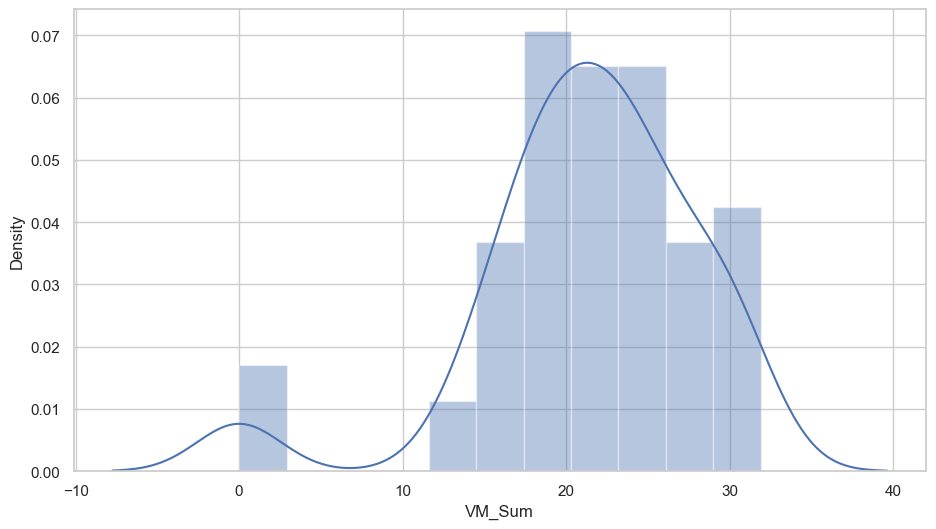

In [24]:
# Get the distribution plot for VM_Sum

df_all['VM_Sum'] = df_all.loc[:, 'Detergent 1':'Bag 2'].sum(axis=1)
sns.distplot(df_all['VM_Sum'])


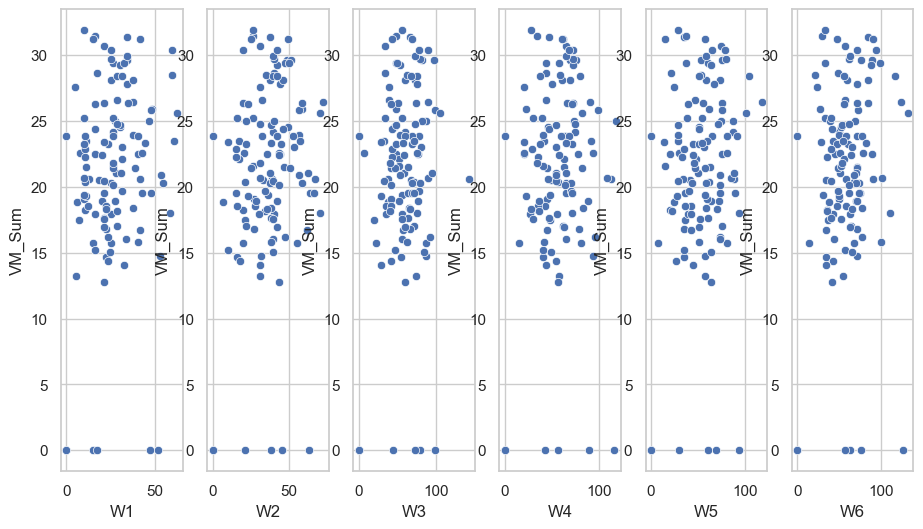

In [25]:
# Plot Scatterplot for 5 washers

features = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6']
target = df_all['VM_Sum']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_all[col]
    y = target
    sns.scatterplot(x,y)


# LR using statemodels 

In [26]:
# Prepare dataset for Linear Regression for W3 agains VM_Sum

import statsmodels.api as sm

X = df_all[['W3']]
Y = df_all[['VM_Sum']]


In [29]:
# Using OLS

# your codes here...
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 VM_Sum   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              543.0
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                    1.48e-46
Time:                        15:46:51   Log-Likelihood:                         -448.33
No. Observations:                 122   AIC:                                      898.7
Df Residuals:                     121   BIC:                                      901.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W3             0.3195      0.014     23.302      0.000       0.292       0.347
==============================================================================
Omnibus:                       19.735   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.245
Skew:                          -0.819   Prob(JB):                     7.36e-07
Kurtosis:                       4.695   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

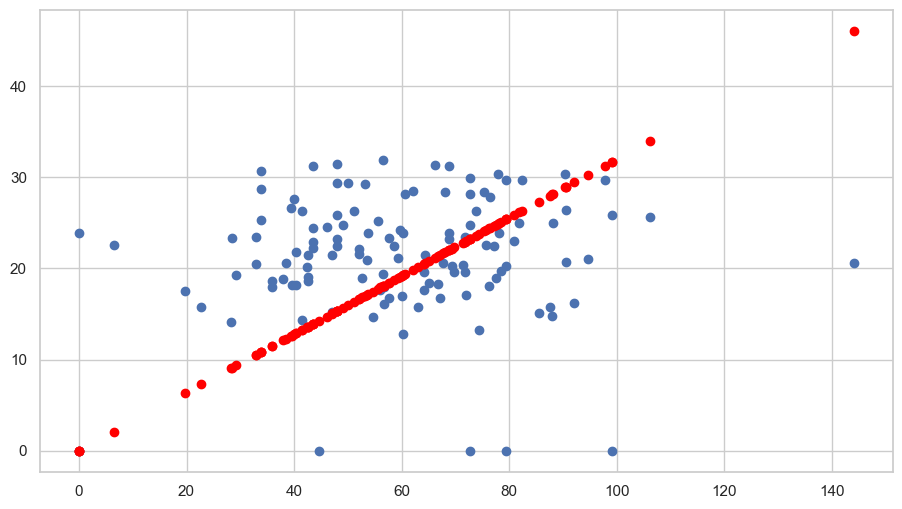

In [30]:
plt.scatter(X['W3'],Y)
plt.scatter(X['W3'],predictions, color='red')


In [31]:
# Retrieve the model summary

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 VM_Sum   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.744
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.189
Time:                        15:48:21   Log-Likelihood:                -404.81
No. Observations:                 122   AIC:                             813.6
Df Residuals:                     120   BIC:                             819.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1998      1.718     11.178      0.000      15.799      22.601
W3             0.0358      0.027      1.321      0.189      -0.018       0.090
==============================================================================
Omnibus:                       35.199   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.307
Skew:                          -1.258   Prob(JB):                     6.59e-15
Kurtosis:                       5.553   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

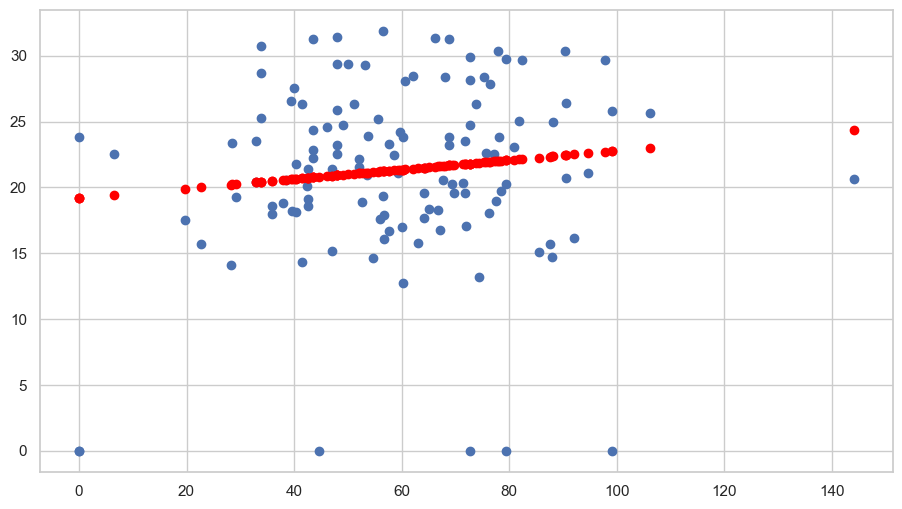

In [32]:
plt.scatter(X['W3'],Y)
plt.scatter(X['W3'],predictions, color='red')

# the increase usage of W3, have not much impact in total sales of the vending machine

# LR using sklearn

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


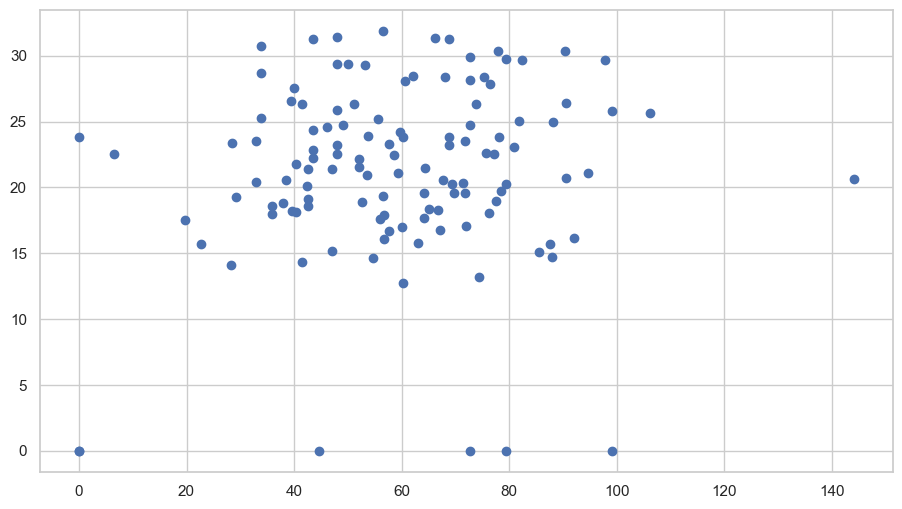

In [34]:
X = df_all.loc[:,'W3'] 
Y = df_all.loc[:,'VM_Sum'] 

plt.plot(X,Y, linestyle='',marker='o')

In [35]:
X = df_all.loc[:,['W3']] 
Y = df_all.loc[:,'VM_Sum'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(97, 1)
(97,)
(25, 1)
(25,)


In [36]:
# Linear Regression model construction

# your codes here...
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [37]:
# Get the coefficient

lm.coef_ 

array([0.04808985])

In [38]:
# Get the intercept

lm.intercept_

18.68643098559379

In [40]:
# perform prediction on X_test

# your codes here...
Y_test_pred = lm.predict(X_test)
Y_test_pred = pd.DataFrame(Y_test_pred, columns=['PredictedSum'])


In [41]:
# Construct a table to compare VM_Sum and PredictedSum

df_tmp = df_all.loc[:,['W3','VM_Sum']]
df_new = pd.concat([df_tmp.reset_index(drop=True), Y_test_pred], axis=1) 
df_new.head()


,W3,VM_Sum,PredictedSum
0,67.77,20.54,20.901930
1,37.95,18.84,22.400410
2,39.55,18.21,22.503803
3,19.73,17.51,22.181601
4,38.48,20.56,20.996667


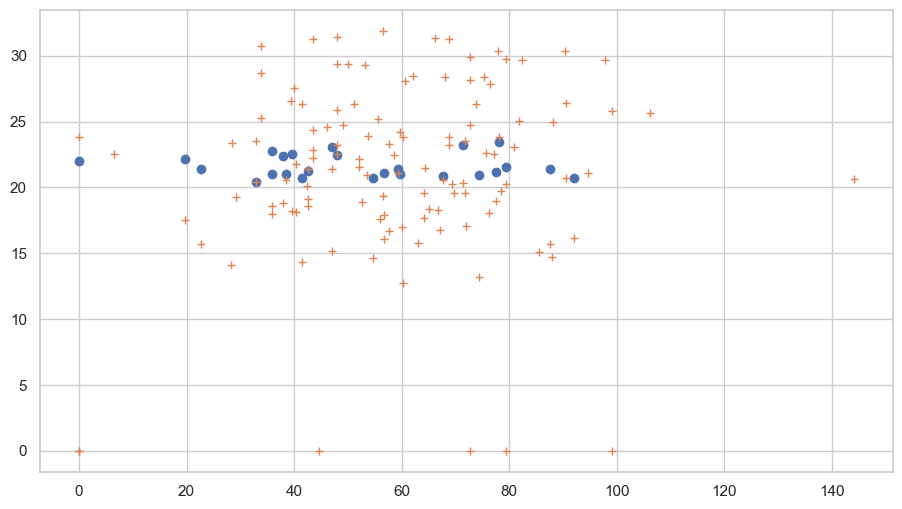

In [42]:
# Plot a scatterplot to compare W3 and PredictedSum and VM_Sum

plt.plot( 'W3', 'PredictedSum', data=df_new, linestyle='', marker='o')  
plt.plot( 'W3', 'VM_Sum', data=df_new, linestyle='', marker='+') 


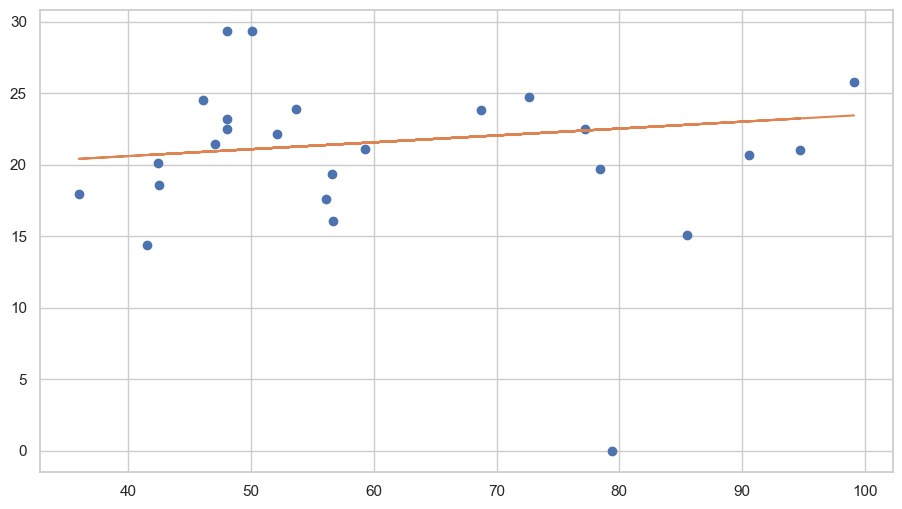

In [43]:
# Plot X_test agains Y_test and Y_test_pred

X_test = X_test.loc[:,'W3']
Y_test_pred = Y_test_pred.squeeze()

plt.plot(X_test, Y_test, 'o')
plt.plot(X_test, Y_test_pred)
plt.show()

In [44]:
lm.coef_ 

array([0.04808985])

In [45]:
lm.intercept_

18.68643098559379

In [47]:
# Get the model to predict Y_test value when X_test = 60

# your codes here...
lm.predict([[60]])



array([21.57182179])